In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [ ]:
corr=df.corr()
corr.shape

<ipython-input-8-0a53fa01a22c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


(30, 30)

<Axes: >

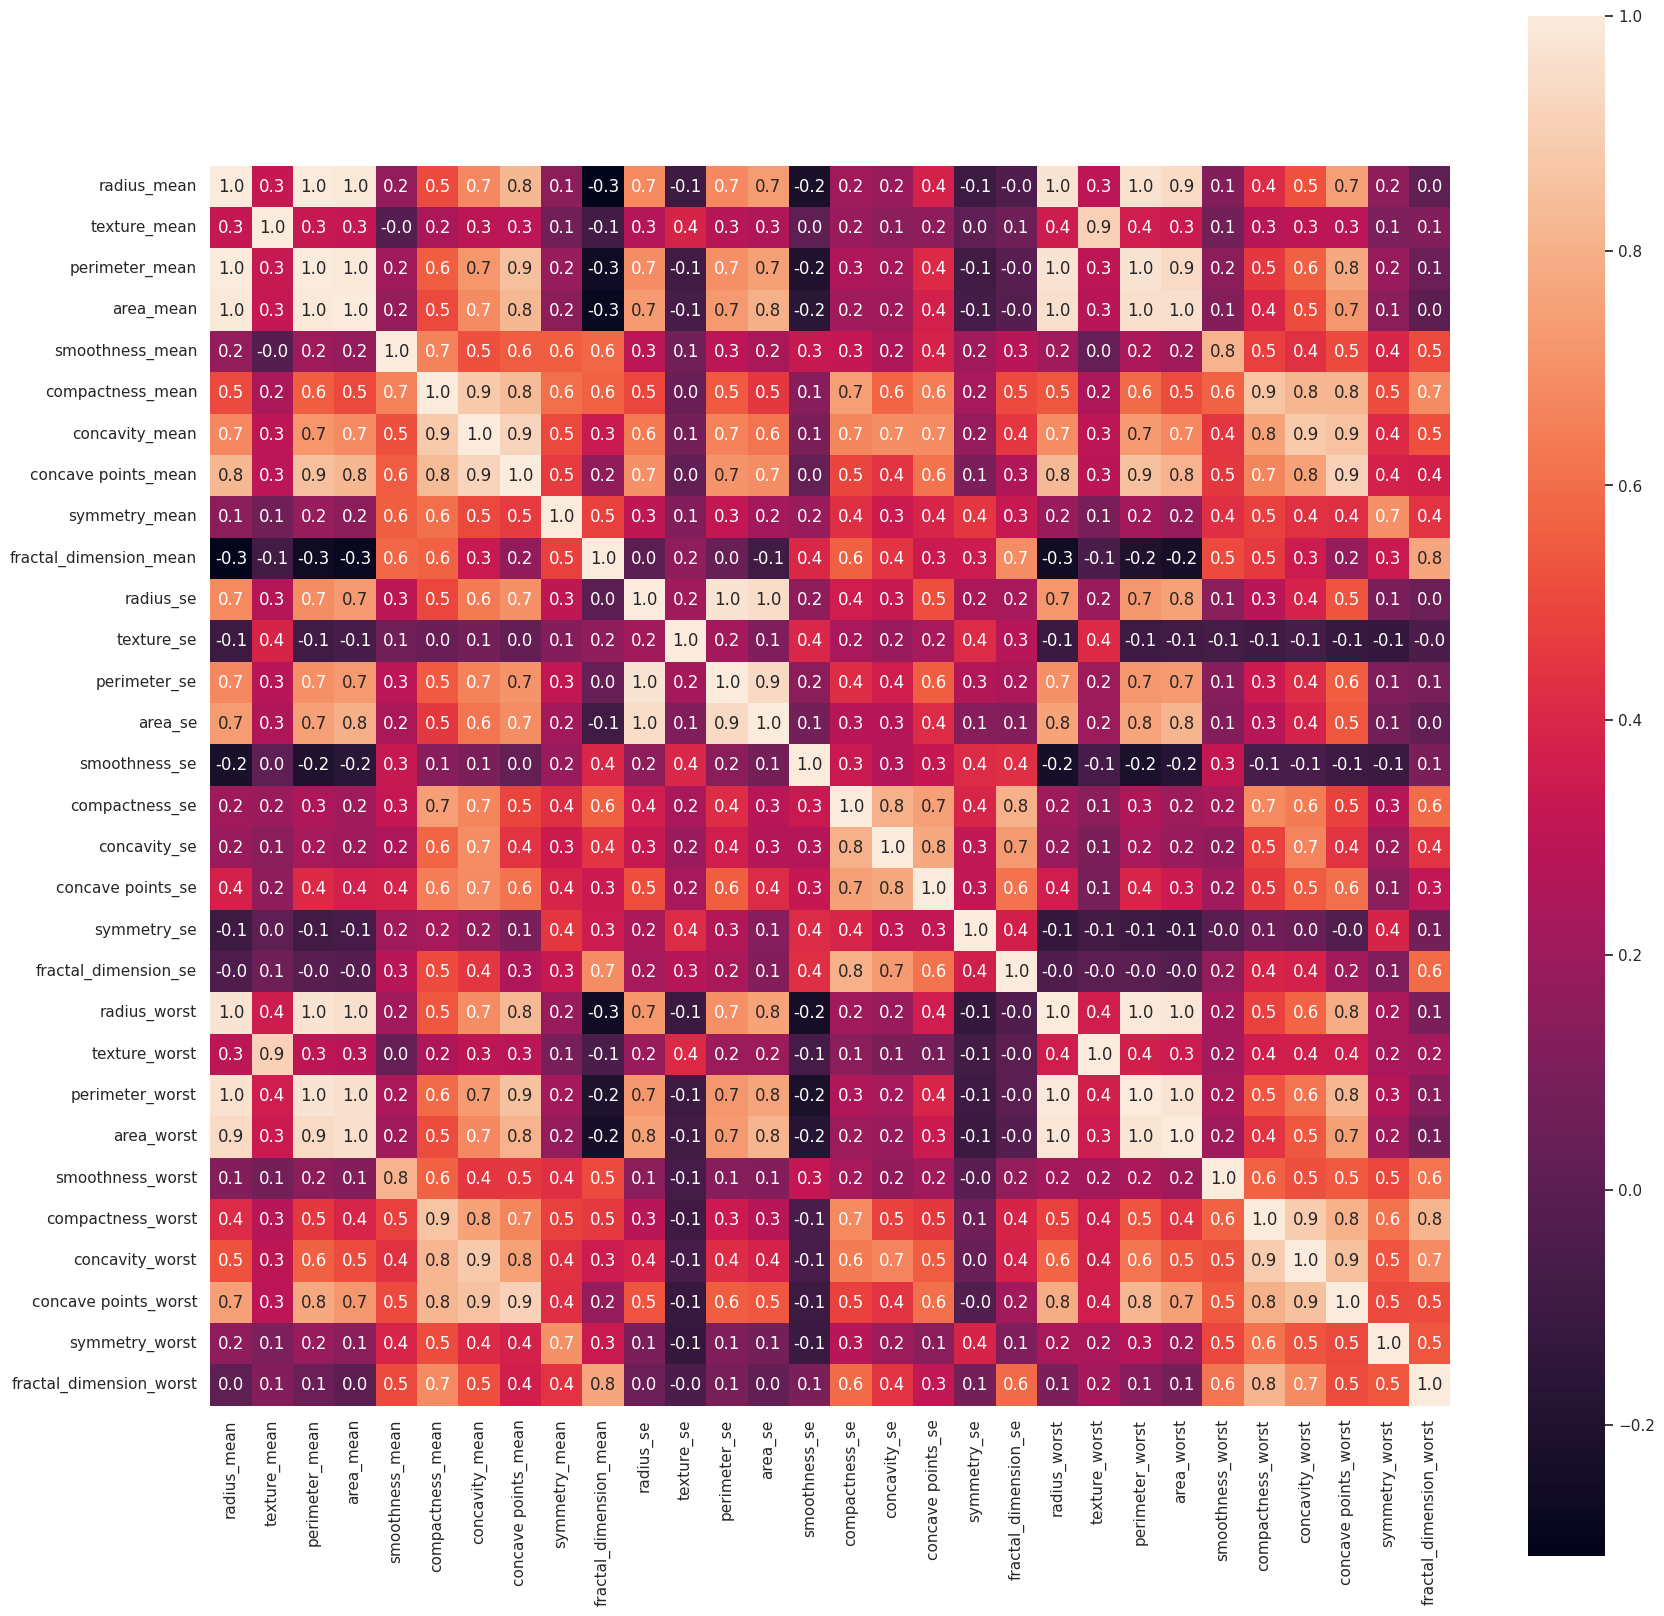

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True)

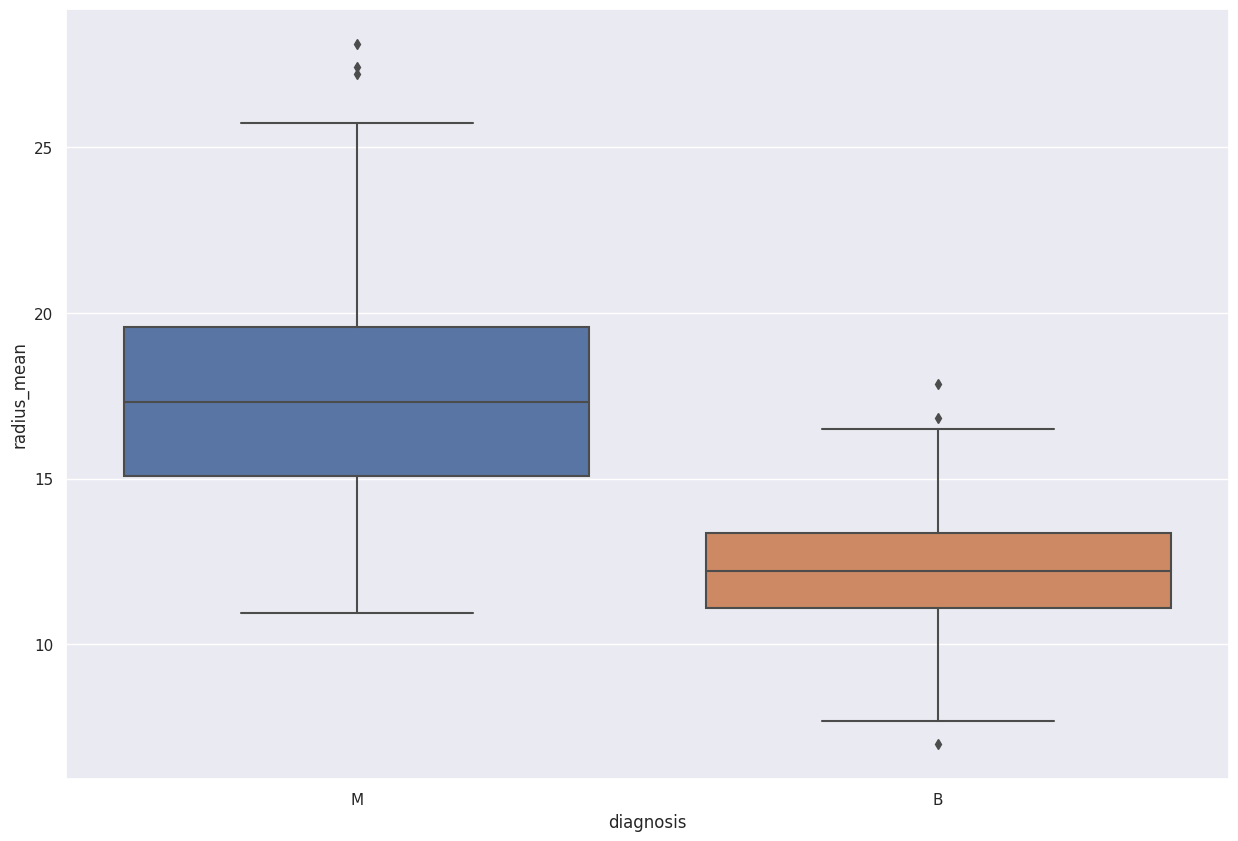

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="diagnosis",y="radius_mean",data=df)
plt.show()

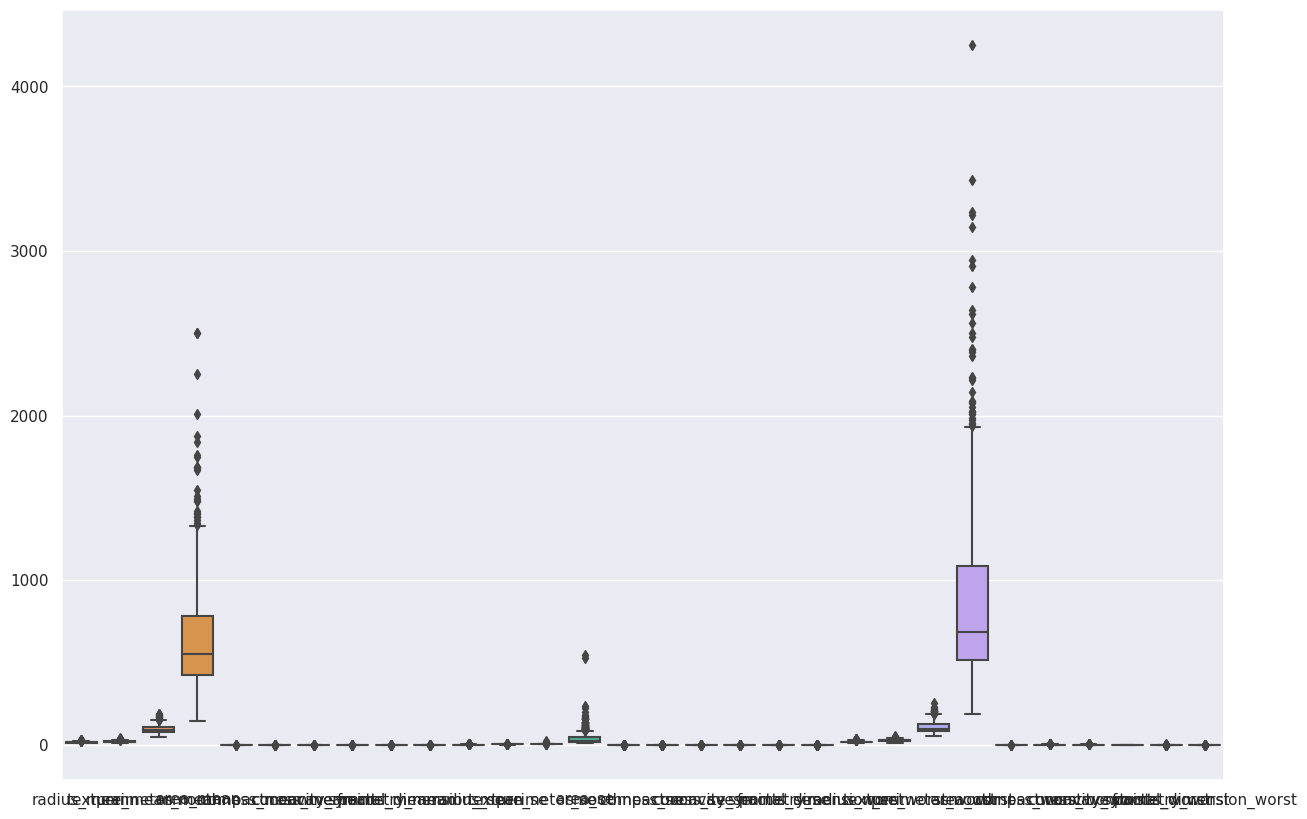

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.show()

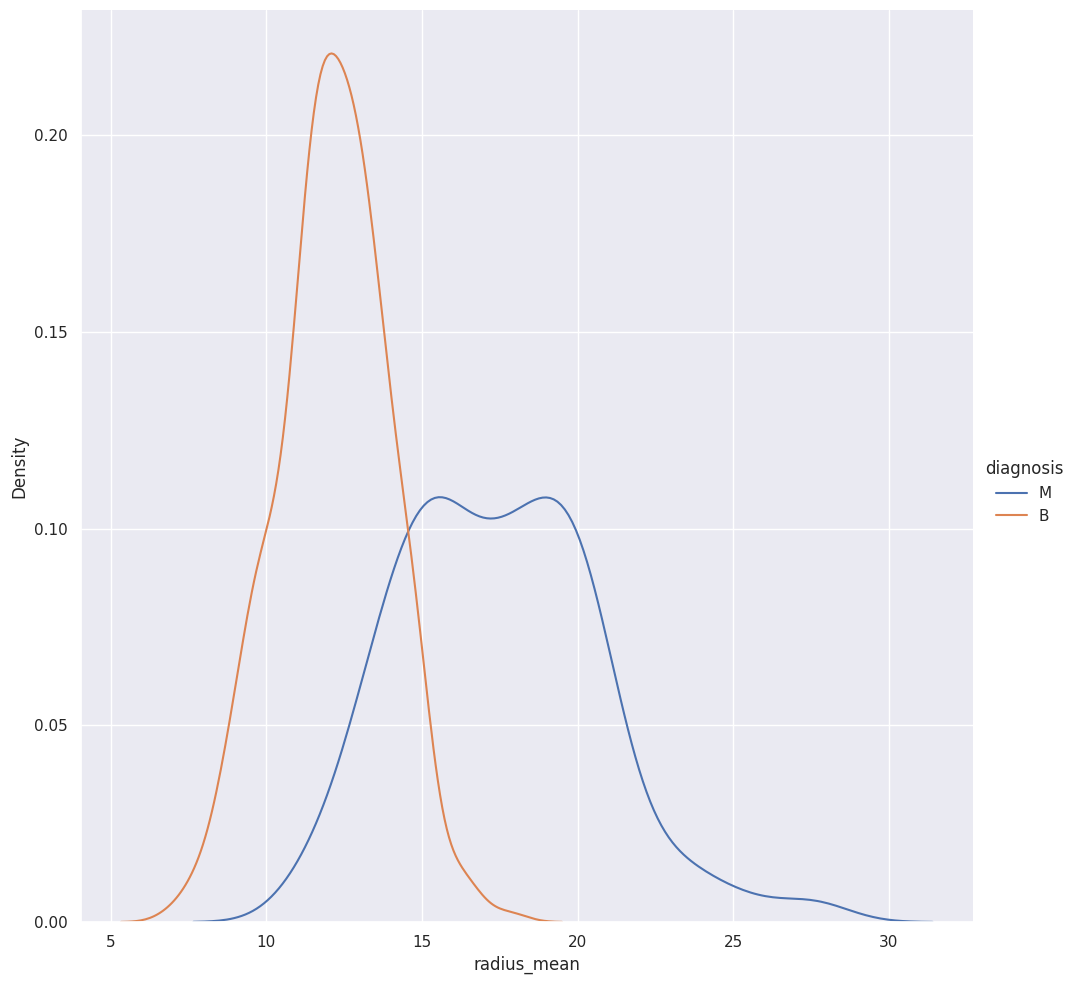

In [ ]:
sns.FacetGrid(df,hue='diagnosis',height=10).map(sns.kdeplot,"radius_mean").add_legend()
plt.show()

In [ ]:
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [ ]:
from scipy.integrate import solve_ivp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (you can use other preprocessing methods as needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cuckoo Search Algorithm for Feature Selection
def cuckoo_search(objective_function, num_dimensions, num_cuckoos, max_generations):
    # Initialize cuckoos randomly
    cuckoos = np.random.rand(num_cuckoos, num_dimensions)
    best_solution = None
    best_fitness = float('inf')

    for generation in range(max_generations):
        # Evaluate fitness for each cuckoo
        fitness_values = [objective_function(c) for c in cuckoos]

        # Update the best solution
        min_fitness_idx = np.argmin(fitness_values)
        if fitness_values[min_fitness_idx] < best_fitness:
            best_fitness = fitness_values[min_fitness_idx]
            best_solution = cuckoos[min_fitness_idx]

        # Perform a random walk (you can modify this step for RK)
        step_size = np.random.rand(num_cuckoos, num_dimensions)
        cuckoos += step_size

        # Abandon a fraction of the worst solutions and replace them with new ones
        # You can replace this step with RK optimization if needed
        # For simplicity, we just generate new random solutions here
        replace_idx = np.argsort(fitness_values)[-int(0.2 * num_cuckoos):]
        cuckoos[replace_idx] = np.random.rand(len(replace_idx), num_dimensions)

    return best_solution, best_fitness

# Define the objective function for CS (e.g., classification accuracy)
def cs_objective_function(selected_features):
    # Train a classifier on the selected features
    classifier = SVC()
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Calculate classification accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # Negative accuracy because CS seeks to minimize

# Use Cuckoo Search to select a subset of features
num_dimensions = X_train.shape[1]
num_cuckoos = 20
max_generations = 100

best_solution, best_fitness = cuckoo_search(cs_objective_function, num_dimensions, num_cuckoos, max_generations)
selected_features = np.where(best_solution > 0.5)[0]

# Runge-Kutta Optimization for Feature Selection (you will need to customize this part)
# Note: RK is not typically used for feature selection, so you may need to adapt it accordingly

def rk_objective_function(selected_features):
    # Train a classifier on the selected features
    classifier = SVC()
    classifier.fit(X_train[:, selected_features], y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test[:, selected_features])


    # Calculate classification accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # Negative accuracy because RK seeks to minimize

# Define the differential equation for RK optimization
def differential_equation(t, features):
    # You can implement your own differential equation
    # Here, we use a simple linear equation as an example
    return -features

# Set up RK optimization
t_span = (0, 1)  # Time span
initial_features = np.ones(num_dimensions)  # Initial feature values

# Solve the differential equation using RK
solution = solve_ivp(differential_equation, t_span, initial_features, method='RK45')

# Get the optimized features from the solution
optimized_features = solution.y[:, -1]

# Use the selected and optimized features for classification
final_selected_features = selected_features
final_optimized_features = np.where(optimized_features > 0.5)[0]
final_features = np.union1d(final_selected_features, final_optimized_features)

# Train a classifier on the final feature set
final_classifier = SVC()
final_classifier.fit(X_train[:, final_features], y_train)

# Make predictions on the test set
y_final_pred = final_classifier.predict(X_test[:, final_features])

# Evaluate the final classifier's performance
final_accuracy = accuracy_score(y_test, y_final_pred)
print("Final Classification Accuracy:", final_accuracy)



Final Classification Accuracy: 0.9824561403508771


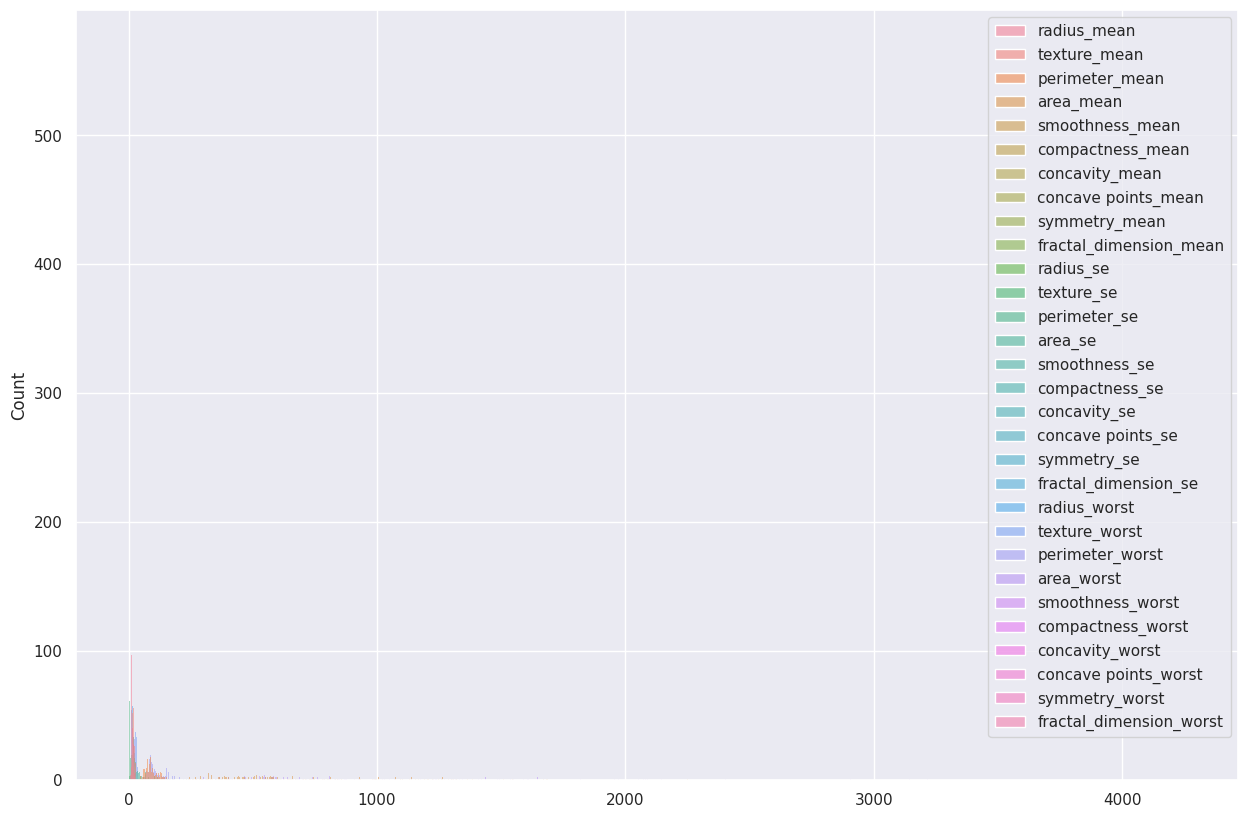

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_final_pred)

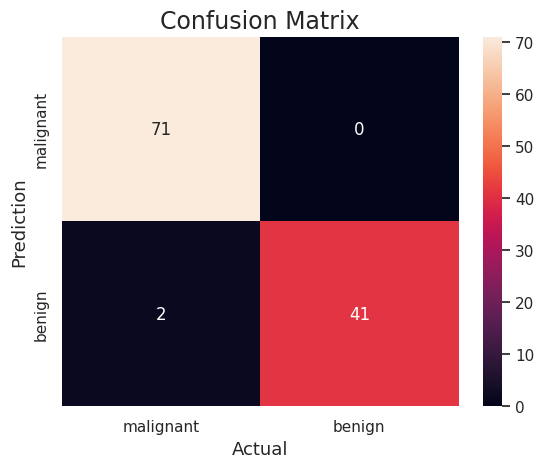

In [ ]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogReg=LogisticRegression()

In [ ]:
LogReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
LogReg_score = LogReg.predict_proba(X_test)[:, 1]

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, LogReg_score, pos_label=1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Text(0.5, 0, 'Recall')

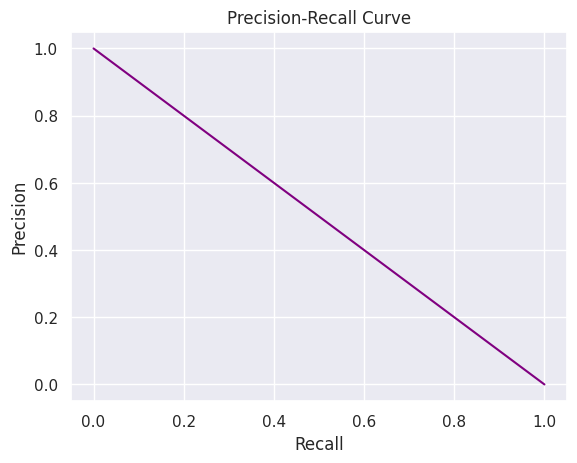

In [ ]:
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')